In [1]:
#import the required directories
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/novartis-data/sample_submission.csv
/kaggle/input/novartis-data/Train.csv
/kaggle/input/novartis-data/Test.csv


# Loading the Data

In [2]:
train_df = pd.read_csv('/kaggle/input/novartis-data/Train.csv')
train_df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [3]:
print("Training data has {} rows & {} columns".format(train_df.shape[0],train_df.shape[1]))

Training data has 23856 rows & 18 columns


In [30]:
test_df = pd.read_csv('/kaggle/input/novartis-data/Test.csv')
test_df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [31]:
print("Testing data has {} rows & {} columns".format(test_df.shape[0],test_df.shape[1]))

Testing data has 15903 rows & 17 columns


# Analyzing the Data

### The features X1 to X15 are anonymized logging parameters. 
### Target values are 1 or 0, so we have to solve the classification problem.

In [6]:
train_df.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

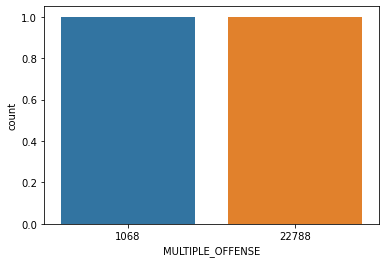

In [8]:
sns.countplot(train_df.MULTIPLE_OFFENSE.value_counts())

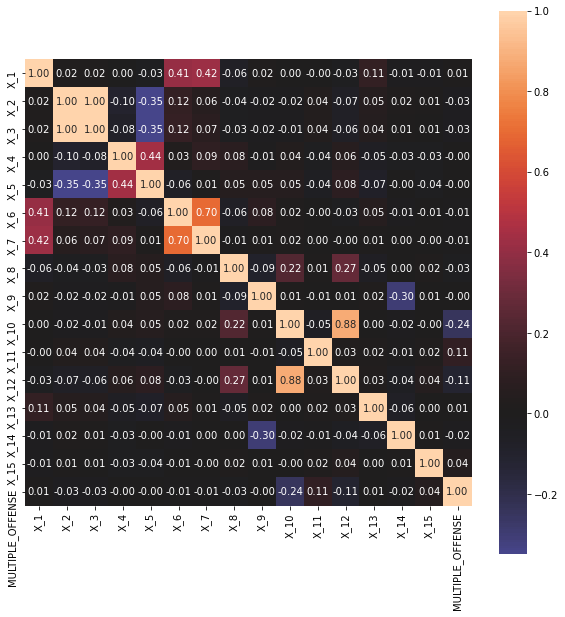

In [9]:
correlations = train_df.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, annot=True)
plt.show()

### The matrix above shows that the corelation between any two independent variables is not more than 0.5, so there is no multi-collinearity between the variables.

## Cleaning the Data

In [32]:
# Drop the date and incident ID column because they have no impact in determining the target variable.

X = train_df.drop(['INCIDENT_ID', 'DATE'], axis=1)

test_X = test_df.drop(['INCIDENT_ID', 'DATE'], axis=1)

In [33]:
X.isnull().sum()

X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [34]:
# Drop the null values of the variable X_12
X.dropna(inplace=True)
X.isnull().sum()

X_1                 0
X_2                 0
X_3                 0
X_4                 0
X_5                 0
X_6                 0
X_7                 0
X_8                 0
X_9                 0
X_10                0
X_11                0
X_12                0
X_13                0
X_14                0
X_15                0
MULTIPLE_OFFENSE    0
dtype: int64

In [35]:
y = X['MULTIPLE_OFFENSE']
X = X.drop(['MULTIPLE_OFFENSE'], axis=1)

In [36]:
test_X.isnull().sum()

X_1       0
X_2       0
X_3       0
X_4       0
X_5       0
X_6       0
X_7       0
X_8       0
X_9       0
X_10      0
X_11      0
X_12    127
X_13      0
X_14      0
X_15      0
dtype: int64

In [37]:
#Fill in the null values with the mean value of the column.

test_X.fillna(train_df['X_12'].mean(), inplace=True)
test_X.isnull().sum()

X_1     0
X_2     0
X_3     0
X_4     0
X_5     0
X_6     0
X_7     0
X_8     0
X_9     0
X_10    0
X_11    0
X_12    0
X_13    0
X_14    0
X_15    0
dtype: int64

In [38]:
test_X.shape

(15903, 15)

## Applying Machine Learning Algorithms

#### Apply algorithms such as Logistic Regression, KNN and Naive Bayes. Select the model with the highest accuracy score.

In [17]:
from sklearn.model_selection import train_test_split

#split the training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)

(18939, 15)


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
cross_score = []
accu_score = []

Logistic Regression: 
0.9556480316857121
0.9571277719112988


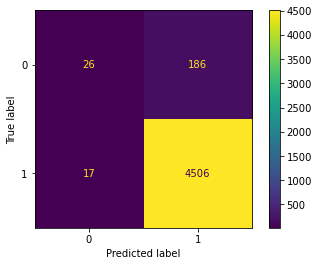

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
print("Logistic Regression: ")
print(cross_val_score(logreg, X_test, y_test, cv=10, scoring='accuracy').mean())
cross_score.append(cross_val_score(logreg, X_test, y_test, cv=10, scoring='accuracy').mean())
print(accuracy_score(y_test, logreg.predict(X_test)))
accu_score.append(accuracy_score(y_test, logreg.predict(X_test)))
confusion_matrix = plot_confusion_matrix(logreg, X_test, y_test)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
score = []
for i in range(1,11):
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN.fit(X_train, y_train)
    score.append(accuracy_score(y_test, KNN.predict(X_test)))


k = score.index(max(score)) + 1

KNN: 
0.9586034022890072
0.973389651531151


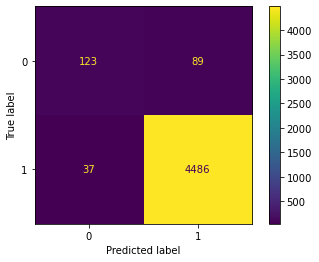

In [21]:
print("KNN: ")
KNN1 = KNeighborsClassifier(n_neighbors = k)
KNN1.fit(X_train, y_train)
print(cross_val_score(KNN1, X_test, y_test, cv=10, scoring='accuracy').mean())
cross_score.append(cross_val_score(KNN1, X_test, y_test, cv=10, scoring='accuracy').mean())
print(accuracy_score(y_test, KNN1.predict(X_test)))
accu_score.append(accuracy_score(y_test, KNN1.predict(X_test)))
confusion_matrix = plot_confusion_matrix(KNN1, X_test, y_test)

0.9444500941115601
0.9453009503695882


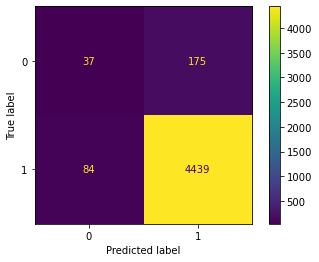

In [22]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(X_train, y_train)
print(cross_val_score(naive, X_test, y_test, cv=10, scoring='accuracy').mean())
cross_score.append(cross_val_score(naive, X_test, y_test, cv=10, scoring='accuracy').mean())
print(accuracy_score(y_test, naive.predict(X_test)))
accu_score.append(accuracy_score(y_test, naive.predict(X_test)))
confusion_matrix = plot_confusion_matrix(naive, X_test, y_test)

### Calculating cross val score on some well known variants of classifiers.

0.9866954799689566
0.9934530095036959


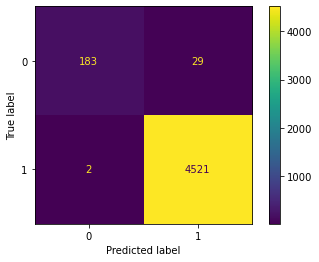

In [23]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
print(cross_val_score(forest, X_test, y_test, cv=10, scoring='accuracy').mean())
cross_score.append(cross_val_score(forest, X_test, y_test, cv=10, scoring='accuracy').mean())
print(accuracy_score(y_test, forest.predict(X_test)))
accu_score.append(accuracy_score(y_test, forest.predict(X_test)))
confusion_matrix = plot_confusion_matrix(forest, X_test, y_test)

In [24]:
algo = ["Logistic Regression", "KNN", "Naive Bayes", "Random Forest"]

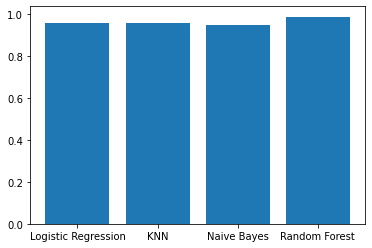

In [25]:
plt.bar(algo, cross_score)
plt.show()

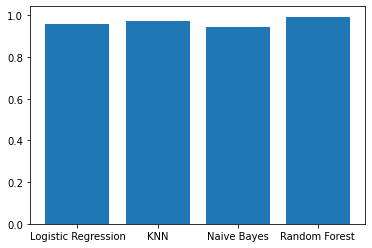

In [26]:
plt.bar(algo, accu_score)
plt.show()

### From the two bar charts it is clear Random Forest has the highest accuracy score and hence we will use this model.

#### First we shall observe that the results obtained in case of the different algorithms will vary.

In [39]:
pred_log = logreg.predict(test_X)
count = 0
for i in pred_log:
    if i == 1:
        count+=1

print(count)

15747


In [40]:
pred_knn = KNN1.predict(test_X)
count1 = 0
for i in pred_knn:
    if i == 1:
        count1+=1

print(count1)

15358


In [41]:
pred_nb = naive.predict(test_X)
count2 = 0
for i in pred_nb:
    if i == 1:
        count2+=1

print(count2)

15448


In [42]:
test_X["Multiple Offense"] = forest.predict(test_X)
test_X.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,Multiple Offense
0,0,30,35,7,3,6,4,0,5,1,174,0.974064,72,119,23,1
1,0,44,44,1,3,7,1,4,6,1,316,0.000000,12,29,34,1
2,0,34,33,3,5,2,7,3,0,1,316,1.000000,72,0,34,1
3,7,3,2,3,5,9,8,0,5,1,174,1.000000,112,87,34,1
4,0,7,8,7,3,2,7,1,5,1,174,0.000000,112,93,43,1


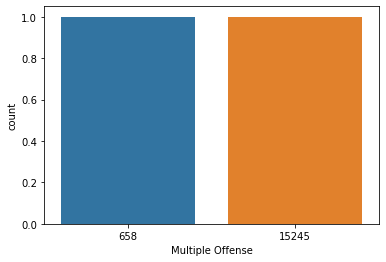

In [43]:
sns.countplot(test_X["Multiple Offense"].value_counts())

In [44]:
y_predict = test_X["Multiple Offense"]

In [46]:
test_df["MULTIPLE OFFENSE"] = test_X["Multiple Offense"]
test_df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE OFFENSE
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23,1
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34,1
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34,1
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34,1
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43,1


# RSA encryption

#### To increase the security and keep our results safe from the hackers we shall encrypt the target values with the help of RSA encryption scheme.

## RSA Key Generation

### For the simplicity of calculation we shall use two very small prime numbers.

In [151]:
p = 7
q = 17
n = p*q
phi = (p-1)*(q-1)

In [183]:
import math
for num in range(2,phi):
    if math.gcd(num,phi) == 1 and num%7!= 0 and num%17!=0:
        e = num
e

95

In [184]:
for x in range(1, phi): 
    if ((x*e)%phi == 1):
        d = x
d

95

## RSA Encryption

In [185]:
msg = []
equal = (y_predict.shape[0]//10000)+1
for j in range(0,7952):
    msg.append(''.join([str(elem) for elem in y_predict[equal*j:equal*(j+1)]]))

### Since the encryption of each element will require a lot of time so I will execute the algorithm only for the first element of the list.

In [194]:
y_encrypt = []
for l in range(0,7952):
    y_encrypt.append(((int(msg[l]))**e)%n)

y_encrypt

[65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 1,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 1,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 12,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 12,
 65,
 65,
 12,
 65,
 65,
 1,
 1,
 1,
 65,
 65,
 65,
 65,
 12,
 65,
 65,
 65,
 65,
 65,
 65,
 1,
 65,
 1,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 12,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 1,
 65,
 65,
 12,
 65,
 65,
 65,
 12,
 65,
 65,
 65,
 65,
 1,
 65,
 65,
 65,
 65,
 65,
 12,
 1,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 1,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 12,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 1,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 6

## RSA Decryption

In [195]:
y_decrypt = []
for m in range(0,7952):
    y_decrypt.append(((y_encrypt[m])**d)%(n))

y_decrypt

[11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 1,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 1,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 11,
 11,
 10,
 11,
 11,
 1,
 1,
 1,
 11,
 11,
 11,
 11,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 1,
 11,
 1,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 1,
 11,
 11,
 10,
 11,
 11,
 11,
 10,
 11,
 11,
 11,
 11,
 1,
 11,
 11,
 11,
 11,
 11,
 10,
 1,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 1,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 1,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 1

In [198]:
for s in range(0,7952):
    if int(msg[s]) != y_decrypt[s]:
        print("error at position" +{s})
        
else:
    print("RSA has been implemented successfully")